<a href="https://colab.research.google.com/github/Ayubbett/Week-2-IP-Core/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_10_AYUB_BETT_PYTHON_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **FINANCIAL INCLUSION**


# **UNIVARIATE ANALYSIS**

# **1. Defining the Question**

# a) Specifying the Question

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.

# b) Defining the Metric for Success

WE will measure our success basing on finding which factor are likely to make one own or use a bank account


# c) Understanding the context

There has been a low usage or turn out on usage of bank accounts by people around East Africa. So we will try to find out the factors influencing ownership and usage of a bank account.


# d) Recording the Experimental Design

# e) Data Relevance

# **2. Reading the Data**

In [ ]:
# Loading the Data from the source i.e. csv
url = 'http://bit.ly/FinancialDataset'
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(url)
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# **3. Checking the Data**

In [ ]:
# Determining the no. of records in our dataset
#
df.shape

(23524, 13)

In [ ]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the bottom of our dataset
# 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# **4. External Data Source Validation**

We can verify our data from looking at the records from finscope Rwanda, Uganda, Tanzania and Kenya.

# **5. Tidying the Dataset**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


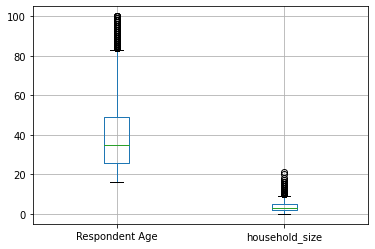

In [ ]:
# Checking for Outliers
#Checking in the household size and respondent age
df.boxplot(["Respondent Age", "household_size"])

In [ ]:
#Dropping outliers
#Removing household with zero members
h_hold = df[ df['household_size'] == 0 ].index
df.drop(h_hold , inplace=True)

In [ ]:
#REmoving the oulier years
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Checking for Anomalies
#Finding the iterquartile range for age

q1_age = df['Respondent Age'].quantile(.25)
q3_age = df['Respondent Age'].quantile(.75)

iqr_age = q3_age - q1_age

#Finding the iterquartile range for age
q1_size = df['household_size'].quantile(.25)
q3_size = df['household_size'].quantile(.75)

iqr_size = q3_size - q1_size

print(iqr_age,iqr_size)

22.0 3.0


In [ ]:
# Identifying the Missing Data
#
df.isnull().sum()

#From this we notice that we have missing values

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
# Dealing with the Missing Data
#
df1 = df.dropna()
df1.isnull().sum()

#We drop the rows with missing values

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
# More data cleaning procedures
#By looking at the unique values below we notice some typos
df1['year'].unique()

#We change them respectively
df1.loc[2].replace(to_replace=(2029,2056,2039), value=(2019,2016,2019))
df1['year'].unique()

#We have now replaced the typos

array([2018, 2016, 2017])

In [ ]:
#Dropping unnecesary columns
df1.drop(['uniqueid', 'The relathip with head'], axis = 1, inplace = True)
df1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [ ]:
#Changing the categorical data into numerical
def Check(df1):
   if df1['Has a Bank account']== "Yes":
      return 1
   else:
      return 0 
df1['Has a Bank account'] = df.apply(Check, axis=1)
df1.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,1,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


In [ ]:
#Changing rural column to numerical
def Check(df1):
   if df1['Type of Location']== "Urban":
      return 1
   else:
      return 0 
df1['Type of Location'] = df.apply(Check, axis=1)

#Changing cell phone access from categorical to numerical
def Check(df1):
   if df1['Cell Phone Access']== "Yes":
      return 1
   else:
      return 0 
df1['Cell Phone Access'] = df.apply(Check, axis=1)

#Changing gender to numerical
def Check(df1):
   if df1['gender_of_respondent']== "Male":
      return 1
   else:
      return 0 
df1['gender_of_respondent'] = df.apply(Check, axis=1)

#Changing type of job to numerical
def Check(df1):
   if df1['Type of Job']== "Self employed":
      return 1
   elif df1['Type of Job']== "Government Dependent":
      return 2
   elif df1['Type of Job']== "Formally employed Private":
     return 3
   elif df1['Type of Job']== "Informally employed":
      return 4
   elif df1['Type of Job']== "Formally employed Government":
      return 5
   elif df1['Type of Job']== "Farming and Fishing":
     return 6
   elif df1['Type of Job']== "Remittance Dependent":
      return 7
   elif df1['Type of Job']== "Other Income":
      return 8
   elif df1['Type of Job']== "Dont Know/Refuse to answer":
     return 9
   else:
      return 0 
df1['Type of Job'] = df.apply(Check, axis=1)
df1.head(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,1,0,1,3.0,24.0,0,Married/Living together,Secondary education,1
1,Kenya,2018,0,0,0,5.0,70.0,0,Widowed,No formal education,2
2,Kenya,2018,1,1,1,5.0,26.0,1,Single/Never Married,Vocational/Specialised training,1
3,Kenya,2018,0,0,1,5.0,34.0,0,Married/Living together,Primary education,3
4,Kenya,2018,0,1,0,8.0,26.0,1,Single/Never Married,Primary education,4


In [ ]:
#Checking if the appropriate datatypes are in place
df1.dtypes

country                  object
year                      int64
Has a Bank account        int64
Type of Location          int64
Cell Phone Access         int64
household_size          float64
Respondent Age          float64
gender_of_respondent      int64
marital_status           object
Level of Educuation      object
Type of Job               int64
dtype: object

In [ ]:
#Changing dtypes of household size and respondent age
df1['household_size']=df1['household_size'].astype('int64')
df1['Respondent Age'] = df1['Respondent Age'].astype('int64')
print(df1.dtypes)

country                 object
year                     int64
Has a Bank account       int64
Type of Location         int64
Cell Phone Access        int64
household_size           int64
Respondent Age           int64
gender_of_respondent     int64
marital_status          object
Level of Educuation     object
Type of Job              int64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# **6. Exploratory Analysis**

In [ ]:
#Creating a frequecy tables from the categorical data available

df1["Type of Job"].value_counts()
df1["Level of Educuation"].value_counts()
df1["gender_of_respondent"].value_counts()

0    13377
1     9321
Name: gender_of_respondent, dtype: int64

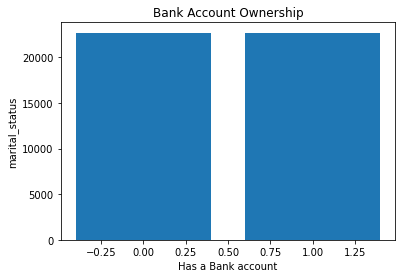

In [ ]:
#Creating a bar chart from age and bank ownership
bank = df1["Has a Bank account"]
age = df1["marital_status"].count()

plt.bar(bank,age )
plt.ylabel("marital_status")
plt.xlabel("Has a Bank account")
plt.title("Bank Account Ownership")
plt.show()

#There is no much difference between people's marital status and their bank account ownership

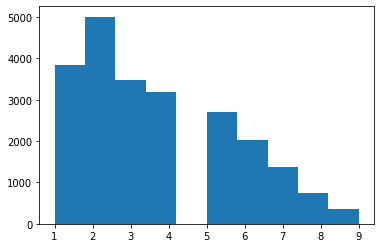

In [ ]:
df1["household_size"].hist(grid = False)

In [ ]:
#Plotting a piechart of 

# Assigning our columns to population and age variables
level = df1['Level of Educuation'].count()
bank        = df['Has a Bank account']

# Plotting our pie chart
# -------
plt.pie(level, labels = age, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pie Chart of Age population')
plt.show()

In [ ]:
#lets find the mean age of the respondents and number of households
mn_age = df1["Respondent Age"].mean()
mn_size = df1["household_size"].mean()
print(mn_age, mn_size)

#The mean age of the respondents is 38 while the average of household size is 4

38.340074015331744 3.5841043263723678


In [ ]:
#lets find the mode age of the respondents and number of households
mo_age = df1["Respondent Age"].mode()
mo_size = df1["household_size"].mode()
print(mo_age, mo_size)

0    30
dtype: int64 0    2
dtype: int64


In [ ]:
#lets find the median age of the respondents and number of households
md_age = df1["Respondent Age"].median()
md_size = df1["household_size"].median()
print(md_age, md_size)

35.0 3.0


In [ ]:
#defining the interquartile range for age
age_max = df1["Respondent Age"].max()
age_min = df1["Respondent Age"].min()
age_range = age_max - age_min

#defining the interquartile range for household size
size_max = df1["household_size"].max()
size_min = df1["household_size"].min()
size_range = size_max - size_min

#Printing out both values
print(age_range, size_range)

67 8


In [ ]:
#lets find the standard deviation age of the respondents and number of households
std_age = df1["Respondent Age"].std()
std_size = df1["household_size"].std()
print(std_age, std_size)

15.795173566072593 2.0781101681031955


In [ ]:
#lets find the variance age of the respondents and number of households
vr_age = df1["Respondent Age"].var()
vr_size = df1["household_size"].var()
print(vr_age, vr_size)

249.48750798235838 4.318541870773892


In [ ]:
#lets find the skewdness age of the respondents and number of households
sk_age = df1["Respondent Age"].skew()
sk_size = df1["household_size"].skew()
print(sk_age, sk_size)

#since both values are positive it means they are positively skewed and their mean is larger than their mode

0.740547706632171 0.6086612029515418


In [ ]:
#lets find the kurtosis age of the respondents and number of households
kt_age = df1["Respondent Age"].kurt()
kt_size = df1["household_size"].kurt()
print(kt_age, kt_size)

#age has kurtosis almost equal to 0 meaning it has a normal distribution also called mesokurtic distribution.
#size has a kurtosis greater than 0 meaning it has a high degree of peakness also called leptokurtic distribution.

-0.23526904531397586 -0.5063903490094659


In [ ]:
#Displaying the summary statistics of the dataframe
df1.describe()

,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,Type of Job
count,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000
mean,2016.968147,0.142480,0.392105,0.747775,3.584104,38.340074,0.410653,4.017094
std,0.846868,0.349549,0.488231,0.434299,2.078110,15.795174,0.491963,2.384979
min,2016.000000,0.000000,0.000000,0.000000,1.000000,16.000000,0.000000,0.000000
25%,2016.000000,0.000000,0.000000,0.000000,2.000000,26.000000,0.000000,1.000000
50%,2017.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,4.000000
75%,2018.000000,0.000000,1.000000,1.000000,5.000000,48.000000,1.000000,6.000000
max,2018.000000,1.000000,1.000000,1.000000,9.000000,83.000000,1.000000,9.000000


# **7. Implementing the Solution**

# **8. Challenging the solution**

# **9. Follow up questions**

# **BIVARIATE ANALYSIS**

# Checking the Data

In [ ]:
#Loading the first rows
df1.head()


,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,1,0,1,3,24,0,Married/Living together,Secondary education,1
1,Kenya,2018,0,0,0,5,70,0,Widowed,No formal education,2
2,Kenya,2018,1,1,1,5,26,1,Single/Never Married,Vocational/Specialised training,1
3,Kenya,2018,0,0,1,5,34,0,Married/Living together,Primary education,3
4,Kenya,2018,0,1,0,8,26,1,Single/Never Married,Primary education,4


In [ ]:
#Loading the last rows
df1.tail()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
23512,Uganda,2018,0,0,0,2,57,0,Divorced/Seperated,No formal education,8
23519,Uganda,2018,0,0,1,4,48,0,Divorced/Seperated,No formal education,8
23520,Uganda,2018,0,0,1,2,27,0,Single/Never Married,Secondary education,8
23521,Uganda,2018,0,0,1,5,27,0,Widowed,Primary education,8
23522,Uganda,2018,0,1,1,7,30,0,Divorced/Seperated,Secondary education,1


In [ ]:
#Checking the shape 
df1.shape

(22698, 11)

In [ ]:
#Grouping by 
df_loc = df1.groupby(['Has a Bank account' , 'Level of Educuation'])
df_loc.head(1)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,1,0,1,3,24,0,Married/Living together,Secondary education,1
1,Kenya,2018,0,0,0,5,70,0,Widowed,No formal education,2
2,Kenya,2018,1,1,1,5,26,1,Single/Never Married,Vocational/Specialised training,1
3,Kenya,2018,0,0,1,5,34,0,Married/Living together,Primary education,3
7,Kenya,2018,0,0,1,1,42,0,Married/Living together,Tertiary education,5
10,Kenya,2018,0,0,1,5,40,0,Married/Living together,Secondary education,6
18,Kenya,2018,0,1,1,1,48,0,Single/Never Married,Vocational/Specialised training,3
32,Kenya,2018,1,1,1,4,62,0,Married/Living together,Primary education,5
63,Kenya,2018,1,1,1,1,25,0,Single/Never Married,Tertiary education,7
167,Kenya,2018,1,0,1,3,42,1,Married/Living together,No formal education,3


In [ ]:
# Query the database for married and living together
df_g1 = df1.query('marital_status' == '1')
 
# Filter out labels of interest
df_g2 = df_g1.filter(['Has a Bank account', 'Type of Location', 'household_size', 'Respondent Age', 'gender_of_respondent'])
 
# Group the value according to a condition
df_g3.groupby('country').count()

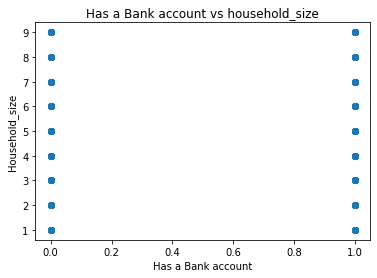

In [ ]:
#Lets plot a scatter plot between year and household size
# Plotting our scatterplot
plt.scatter(df1['Has a Bank account'], df1['household_size'])

# Giving our scatterplot a title
plt.title('Has a Bank account vs household_size')

# Labelling our x axis
plt.xlabel('Has a Bank account')

# Labelling our y axis
plt.ylabel('Household_size')

# Displaying our scatterplot
plt.show()

#From this we notice there is no much relationship between household size and having a bank account

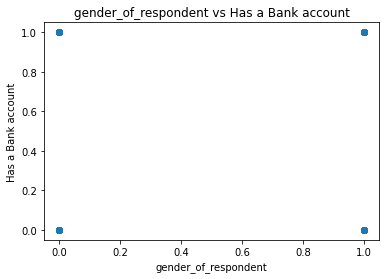

In [ ]:
#Lets plot a scatter plot between year and Respondent Age
# Plotting our scatterplot
plt.scatter(df1['gender_of_respondent'], df1['Has a Bank account'])

# Giving our scatterplot a title
plt.title('gender_of_respondent vs Has a Bank account')

# Labelling our x axis
plt.xlabel('gender_of_respondent')

# Labelling our y axis
plt.ylabel('Has a Bank account')

# Displaying our scatterplot
plt.show()

##From this we notice there is no much relationship between household size and having a bank account

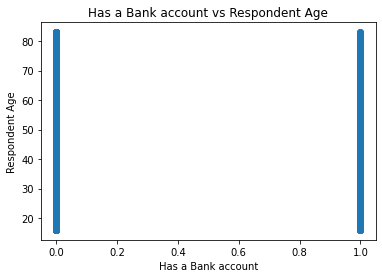

In [ ]:
#Lets plot a scatter plot between Respondent Age and household size
# Plotting our scatterplot
plt.scatter(df1['Has a Bank account'], df1['Respondent Age'])

# Giving our scatterplot a title
plt.title('Has a Bank account vs Respondent Age')

# Labelling our x axis
plt.xlabel('Has a Bank account')

# Labelling our y axis
plt.ylabel('Respondent Age')

# Displaying our scatterplot
plt.show()

##From this we notice there is no much relationship between household size and having a bank account

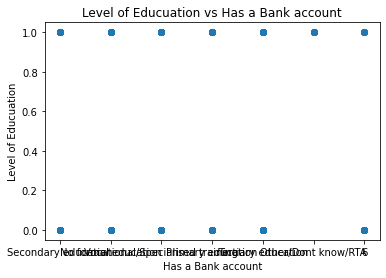

In [ ]:
#Lets plot a scatter plot between Respondent Age and household size
# Plotting our scatterplot
plt.scatter(df1['Level of Educuation'], df1['Has a Bank account'])

# Giving our scatterplot a title
plt.title('Level of Educuation vs Has a Bank account')

# Labelling our x axis
plt.xlabel('Has a Bank account')

# Labelling our y axis
plt.ylabel('Level of Educuation')

# Displaying our scatterplot
plt.show()

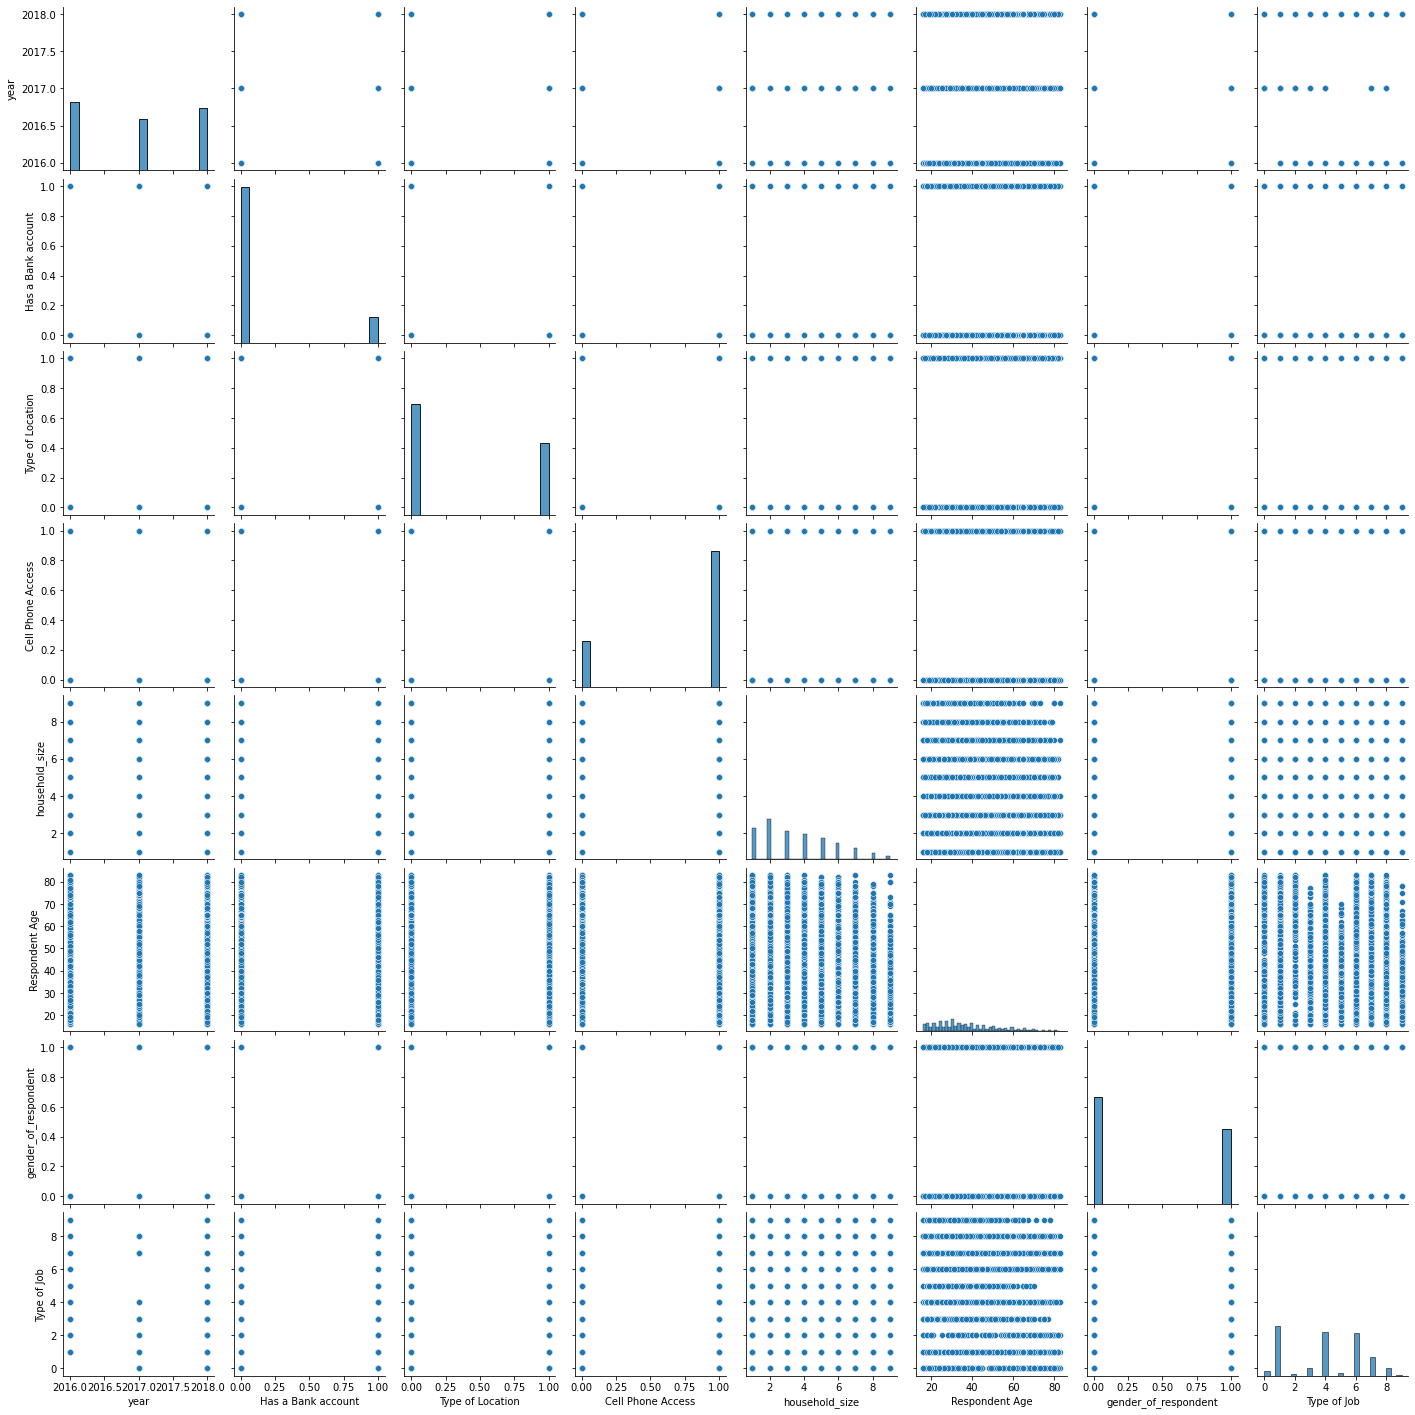

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df1)
plt.show()

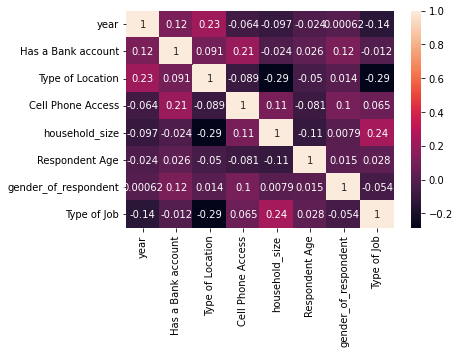

In [ ]:
#Plotting a heat map to show correlation between the variables
sns.heatmap(df1.corr(),annot=True)
plt.show()

#From the correlation matrix we notice that there is no much positive correlation between the variable.
#All variables are mostly negatively related to each other meaning there is no linear relationship between the two.

In [ ]:
#From the correlation matrix above we notice that the value with the highest colleration to owning a bank account is cell phone access
#We can conclude that cell phone access has the greatest influence on owning a bank account

# **MULTIVARIATE ANALYSIS: PRINCIPAL COMPONENT ANALYSIS**

In [ ]:
#Previewing the head of the datset

df1.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,1,0,1,3,24,0,Married/Living together,Secondary education,1
1,Kenya,2018,0,0,0,5,70,0,Widowed,No formal education,2
2,Kenya,2018,1,1,1,5,26,1,Single/Never Married,Vocational/Specialised training,1
3,Kenya,2018,0,0,1,5,34,0,Married/Living together,Primary education,3
4,Kenya,2018,0,1,0,8,26,1,Single/Never Married,Primary education,4


In [ ]:
#Dropping unnecesary columns
df1.drop(['country', 'Level of Educuation'], axis = 1, inplace = True)
df1.head()

In [ ]:
# Step 1: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
X = df1.drop('marital_status', 1)
y = df1['marital_status']

In [ ]:
# Step 2: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Step 3: Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Step 4: Applying PCA 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Step 5: Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

# It can be seen that first principal component is responsible for 21.21% variance. 
# Similarly, the second principal component causes 16.39% variance in the dataset. 
# Collectively we can say that (21.21 + 16.39 +13.39 + 11.88+ 11.06) 73.93% percent of the classification information contained 
# in the feature set is captured by the first two principal components.

array([0.21273592, 0.16392258, 0.13384554, 0.11879538, 0.11058657,
       0.09205716, 0.08774847, 0.08030838])

In [ ]:
# Step 6: Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Step 7: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Step 8: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 2481 instances, 
# resulting in 54.65% accuracy.

[[   0    0  233  185    0]
 [   0    0    1    0    0]
 [   0    0 1647  409    0]
 [   0    0  743  834    0]
 [   0    0  337  151    0]]
Accuracy 0.5464757709251101


In [ ]:
# Step 9: Results with 2 Principal Components
# Now let's try to evaluate classification performance of the random forest algorithm 
# with 2 principal components. 
#
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

# Here the number of components for PCA has been set to 2. 
# The classification results with 2 components are as shown in the output.
# With two principal components the classification accuracy decreases to 83.33% compared to 93.33% for 1 component.

In [ ]:
# Step 10: Results with 2 Principal Components
# Lets now write code to evaluate clasification performance of the 
# random forest algorithm with 3 principal components.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[   0    0  224  190    4]
 [   0    0    1    0    0]
 [   0    0 1637  398   21]
 [   0    0  784  779   14]
 [   0    0  297   95   96]]
Accuracy 0.5533039647577093
